In [1]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
import pathlib
data_dir = pathlib.Path("C:/Users/Public/BirdProject/Bird_Data/Train")

In [3]:
train_dir = "C:/Users/Public/BirdProject/Bird_Data/Train"
val_dir = "C:/Users/Public/BirdProject/Bird_Data/Test"

batch_size = 32
img_height = 244
img_width = 244

In [4]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    validation_split=None,
    subset=None,
    seed=None,
    image_size=(img_height, img_width),
    batch_size=batch_size,
)

# Load the validation dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    val_dir,
    validation_split=None,
    subset=None,
    seed=None,
    image_size=(img_height, img_width),
    batch_size=batch_size,
)

Found 9414 files belonging to 200 classes.
Found 2374 files belonging to 200 classes.


In [5]:
class_names = train_ds.class_names
print(class_names)

['Acadian_Flycatcher', 'American_Crow', 'American_Goldfinch', 'American_Pipit', 'American_Redstart', 'American_Three_toed_Woodpecker', 'Anna_Hummingbird', 'Artic_Tern', 'Baird_Sparrow', 'Baltimore_Oriole', 'Bank_Swallow', 'Barn_Swallow', 'Bay_breasted_Warbler', 'Belted_Kingfisher', 'Bewick_Wren', 'Black_Tern', 'Black_and_white_Warbler', 'Black_billed_Cuckoo', 'Black_capped_Vireo', 'Black_footed_Albatross', 'Black_throated_Blue_Warbler', 'Black_throated_Sparrow', 'Blue_Grosbeak', 'Blue_Jay', 'Blue_headed_Vireo', 'Blue_winged_Warbler', 'Boat_tailed_Grackle', 'Bobolink', 'Bohemian_Waxwing', 'Brandt_Cormorant', 'Brewer_Blackbird', 'Brewer_Sparrow', 'Bronzed_Cowbird', 'Brown_Creeper', 'Brown_Pelican', 'Brown_Thrasher', 'Cactus_Wren', 'California_Gull', 'Canada_Warbler', 'Cape_Glossy_Starling', 'Cape_May_Warbler', 'Cardinal', 'Carolina_Wren', 'Caspian_Tern', 'Cedar_Waxwing', 'Cerulean_Warbler', 'Chestnut_sided_Warbler', 'Chipping_Sparrow', 'Chuck_will_Widow', 'Clark_Nutcracker', 'Clay_colore

In [6]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [7]:
num_classes = len(class_names)

In [8]:
tf.keras.applications.MobileNet(
    input_shape=None,
    alpha=1.0,
    depth_multiplier=1,
    dropout=0.001,
    include_top=True,
    weights='imagenet',
    input_tensor=None,
    pooling=None,
    classes=1000,
    classifier_activation='softmax'
)

In [9]:
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet import preprocess_input, decode_predictions
import numpy as np

In [10]:
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

In [11]:
base_model.trainable = False
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
# Create your custom model on top of the base ResNet50 model
model = Sequential([
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    base_model,  # Add the ResNet50 base model
    GlobalAveragePooling2D(),  # Pooling layer to reduce spatial dimensions
    Dense(128, activation='relu'),  # Custom dense layer
    Dense(num_classes, activation='softmax')  # Output layer with softmax activation for classification
])

In [12]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # Use appropriate loss function
              metrics=['accuracy'])

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator



# Create an instance of ImageDataGenerator with data augmentation parameters
data_augmentation = ImageDataGenerator(
    #preprocessing_function=custom_preprocessing,
    rotation_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)

In [14]:
train_generator = data_augmentation.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'
)

val_generator = data_augmentation.flow_from_directory(
    val_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False  # No need to shuffle for inference
)

Found 9414 images belonging to 200 classes.
Found 2374 images belonging to 200 classes.


In [37]:
batch_data, batch_labels = train_generator.next()

# Check the shapes and values of the batch data and labels
print("Batch Data Shape:", batch_data.shape)
print("Batch Labels Shape:", batch_labels.shape)
print("Batch Data Values:", batch_data)
print("Batch Labels Values:", batch_labels)

Batch Data Shape: (32, 244, 244, 3)
Batch Labels Shape: (32,)
Batch Data Values: [[[[ 61.         69.         45.       ]
   [ 61.         69.         45.       ]
   [ 61.         69.         45.       ]
   ...
   [254.        254.        254.       ]
   [254.        254.        254.       ]
   [254.        254.        254.       ]]

  [[ 61.         69.         45.       ]
   [ 61.         69.         45.       ]
   [ 61.         69.         45.       ]
   ...
   [254.        254.        254.       ]
   [254.        254.        254.       ]
   [254.        254.        254.       ]]

  [[ 61.         69.         45.       ]
   [ 61.         69.         45.       ]
   [ 61.         69.         45.       ]
   ...
   [254.        254.        254.       ]
   [254.        254.        254.       ]
   [254.        254.        254.       ]]

  ...

  [[ 61.         67.         41.       ]
   [ 61.         67.         41.       ]
   [ 61.         67.         41.       ]
   ...
   [ 41.         

In [15]:
epochs = 10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  batch_size=32
)

Epoch 1/10
295/295 [==============================] - 97s 310ms/step - loss: 4.3154 - accuracy: 0.0946 - val_loss: 3.1528 - val_accuracy: 0.2317
Epoch 2/10
295/295 [==============================] - 78s 265ms/step - loss: 2.3914 - accuracy: 0.3837 - val_loss: 2.2045 - val_accuracy: 0.4254
Epoch 3/10
295/295 [==============================] - 81s 274ms/step - loss: 1.7156 - accuracy: 0.5353 - val_loss: 1.9698 - val_accuracy: 0.4680
Epoch 4/10
295/295 [==============================] - 78s 264ms/step - loss: 1.3833 - accuracy: 0.6196 - val_loss: 1.8092 - val_accuracy: 0.5110
Epoch 5/10
295/295 [==============================] - 77s 262ms/step - loss: 1.1641 - accuracy: 0.6764 - val_loss: 1.7493 - val_accuracy: 0.5278
Epoch 6/10
295/295 [==============================] - 79s 268ms/step - loss: 1.0086 - accuracy: 0.7186 - val_loss: 1.7249 - val_accuracy: 0.5295
Epoch 7/10
295/295 [==============================] - 79s 267ms/step - loss: 0.8830 - accuracy: 0.7510 - val_loss: 1.6955 - val_ac

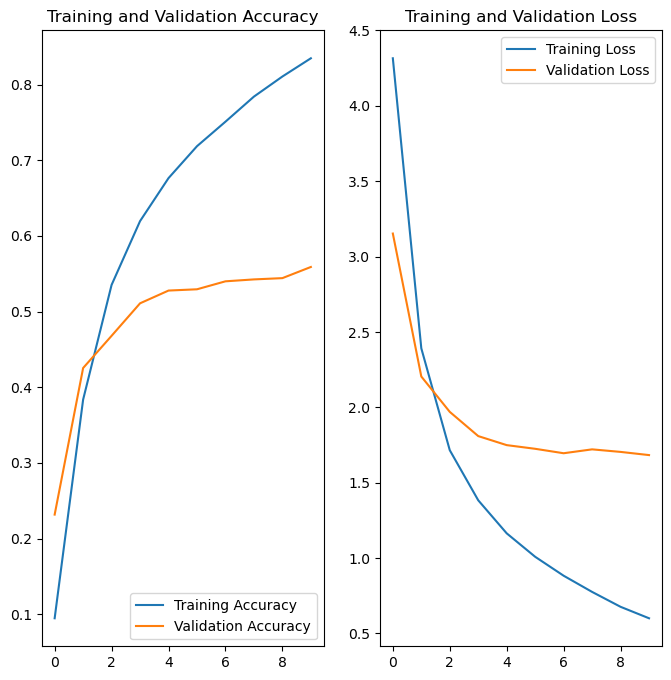

In [16]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()